# Apprendre à utiliser et visualiser un Dataset Synthetic

A la fin de ce workshop vous saurez:

-adopter un workflow de base avec github ( Develop, Verify, Commit)
-Generer un datset de classification 2D avec la librairie sklearn
-Visualiser les classes du dataset sur un graphique 2D
- Visualiser les predictions de votre réseau sur un graphie 2D
-...

In [2]:
#importer les librairies utiles

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_classification

In [9]:
# Créer un dataset séparable par une ligne droite en 2D

def split_dataset(X, y, train_pct=0.66):
    """ Va séparer les datasets avec respect pour le pourcentage du dataset à mettre dans le train set.
    Warning: La dimension des exemples doit être la première.
    
    :X mes exemples, shape=(m, -1), m -> dimensions des exemples
    :y mes labels, shape=(m, -1), m -> dimensions des exemples
    :train_pct (default=0.66) Optionnal, c'est un pourcentage qui va séparer le de dataset avec train_pct * total_size dans le train set.
    
    return X_train, y_train, X_test, y_test 
    

    >>> X_train, y_train, X_test, y_test = split_dataset(X, y)
    """
    # 1ere dimension -> celle des exemples
    total_size = X.shape[0]
    
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    # On récupère `train_pct` % du dataset pour le train set, aussi il faut convertir en entier pour numpy ...
    train_size = int(train_pct * total_size)
    # ... et on met le reste danss le test set
    test_size  = total_size - train_size 
    
    # On met les `train_size` premier exemples/labels dans le train set ...
    X_train, y_train = (X[:train_size], y[:train_size])
    # ... et les test_size derniers exemples/labels dans le test set.
    X_test , y_test  = (X[-test_size:], y[-test_size:])

    # On s'assure que tous les exemples soient présents dans le test set ou le train set.
    assert X_test.shape[0] + X_train.shape[0] == total_size
    assert y_test.shape[0] + y_train.shape[0] == total_size
    
    return X_train, y_train, X_test, y_test 



X, y = make_classification(n_samples=200,
                          n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)

for each in (X, y):
    print(each.shape)

print()

X_train, y_train, X_test, y_test = split_dataset(X, y)

for each in (X_train, y_train, X_test, y_test):
    print(each.shape)

(200, 2)
(200,)

(132, 2)
(132, 1)
(68, 2)
(68, 1)


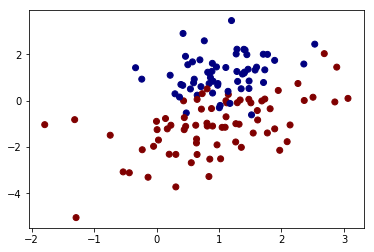

In [18]:
# Refactoriser plot_dataset

def plotdataset(X, y):
    """
    Permet d'afficher les classes `y` d'exemples à 2 features `X` 
    Warning: la dimension des exemples doit etre en premiere.
    Warning2: cette fonction doit recevoir des exemples déjà mélangés car splittée en fonction des index
    TODO : rajouter un argument pour mélanger les datasets
    
    Soit m , le nombre d'exemples.
    
    X, matrices d'exemples, deux features par exemple; shape=(m, 2)
    y, matrices de labels, shape=(m, 1)
    
    return: None
    
    """
    plt.scatter(X[:,0], X[:,1],
                c=y[:,0],
                cmap=plt.cm.jet)
    return None

plotdataset(X_train, y_train)

## Créer un  dataset linéairement séparable

Création d'un dataset de classification en 2D avec la fonction `make_classification` du module `sklearn`

In [19]:
x, y = make_classification?

In [ ]:
#On fix le nombre s'exemples total par dataset à SAMPLE SIZE
SAMPLE_SIZE = 200

#On fixe le hasard
np.random.seed(666)

# On crée le dataset séparable linéairement
x, y = make_classification(n_samples=SAMPLE_SIZE,
                           n_features=20,
                          n_informative=2, 
                           n_redundant=0,
                          n_classes=2, 
                          n_clusters_per_class=1)

#On split le dataset
X_train, y_train, X_test, y_test =  split_dataset(X, y)




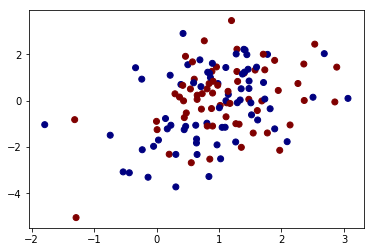

In [46]:
plotdataset(X_train, y_train)
#on affiche le dataset de train

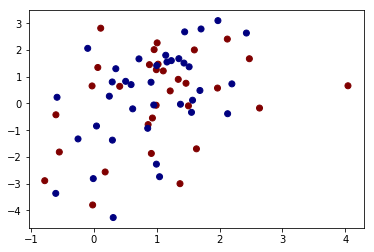

In [44]:
plotdataset(X_test, y_test)
#on affiche le dataset de test

## Créer un  dataset "MOONS"

Création d'un dataset de classification en 2D avec la fonction `make_moons` du module `sklearn`

In [57]:
#On fixe le nombre d'exemples total par dataset à SAMPLE SIZE
SAMPLE_SIZE = 200

#On fixe le hasard
np.random.seed(666)

# On crée le dataset séparable linéairement
x, y = make_moons(n_samples=SAMPLE_SIZE,
                 shuffle= True,
                 noise = 0.1 )

#On split le dataset
X_train, y_train, X_test, y_test =  split_dataset(x, y)




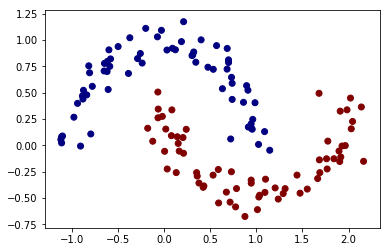

In [58]:
plotdataset(X_train, y_train)
#pour afficher le dataset